In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio


from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
woa = Woa()
grid = grid_read(36)

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [3]:
#times = range(1,121,1)+range(123,363,1)
times = range(3)
pert_const = RunRead()
pert_const.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_cont_ptrac/results/')
pert_const.readStateData(times)
pert_const.readGAD(range(0,220,12))
pert_const.readDynStDiagGAD([6220800,6480000])
pert_const.title('Const restoring','red')
pert_const.readMonitorData([6220800,6480000])
pert_const.readMonitorSeaiceData([6220800,6480000])
pert_const.readDynStData([6220800,6480000])
#pert_const.readTracers(range(0,360,12))
#pert_const.readLayers(range(0,360,12))
#pert_const.seaiceread(range(0,360,1))
#pert_const.mxldepthread(range(0,360,1))
pert_const.fluxCalc()
pert_const.baroCalc()
pert_const.saveflux('exp_contsalt')
pert_const.savepsi('exp_contsalt')
#pert_const.read_flux('exp_contsalt')
#pert_const.read_psi('exp_contsalt')
pert_const.readDynStDiagLayers([6220800,6480000])
pert_const.readDynStDiagPtracers([6220800,6480000])

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_cont_ptrac/results/
Read ['ADVr_TH', 'ADVx_TH', 'ADVy_TH', 'DFrE_TH', 'DFxE_TH', 'DFyE_TH', 'DFrI_TH', 'ADVr_SLT', 'ADVx_SLT', 'ADVy_SLT', 'DFrE_SLT', 'DFxE_SLT', 'DFyE_SLT', 'DFrI_SLT']
Read Monitor
Read Seaice Monitor
Read StDyn data


/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [4]:
#times = range(1,121,1)+range(123,243,1)+range(245,365,1)
times = range(3)
pert_bench = RunRead()
pert_bench.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_benchmark/results/')
pert_bench.title('No restoring','blue')
pert_bench.readStateData(times)
pert_bench.readGAD(range(0,220,12))
pert_bench.readDynStDiagGAD([6220800,6480000])
pert_bench.readMonitorData([6220800,6480000,6739200])
pert_bench.readMonitorSeaiceData([6220800,6480000,6739200])
pert_bench.readDynStData([6220800,6480000,6739200])
#pert_bench.readTracers(range(0,360,12))
#pert_bench.readLayers(range(0,360,12))
#pert_bench.seaiceread(range(0,360,1))
#pert_bench.mxldepthread(range(0,360,1))
pert_bench.fluxCalc()
pert_bench.baroCalc()
pert_bench.saveflux('exp_benchmark')
pert_bench.savepsi('exp_benchmark')
#pert_bench.read_flux('exp_benchmark')
#pert_bench.read_psi('exp_benchmark')
pert_bench.readDynStDiagLayers([6220800,6480000,6739200])
pert_bench.readDynStDiagPtracers([6220800,6480000,6739200])

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_benchmark/results/
Read ['ADVr_TH', 'ADVx_TH', 'ADVy_TH', 'DFrE_TH', 'DFxE_TH', 'DFyE_TH', 'DFrI_TH', 'ADVr_SLT', 'ADVx_SLT', 'ADVy_SLT', 'DFrE_SLT', 'DFxE_SLT', 'DFyE_SLT', 'DFrI_SLT']
Read Monitor
Read Seaice Monitor
Read StDyn data


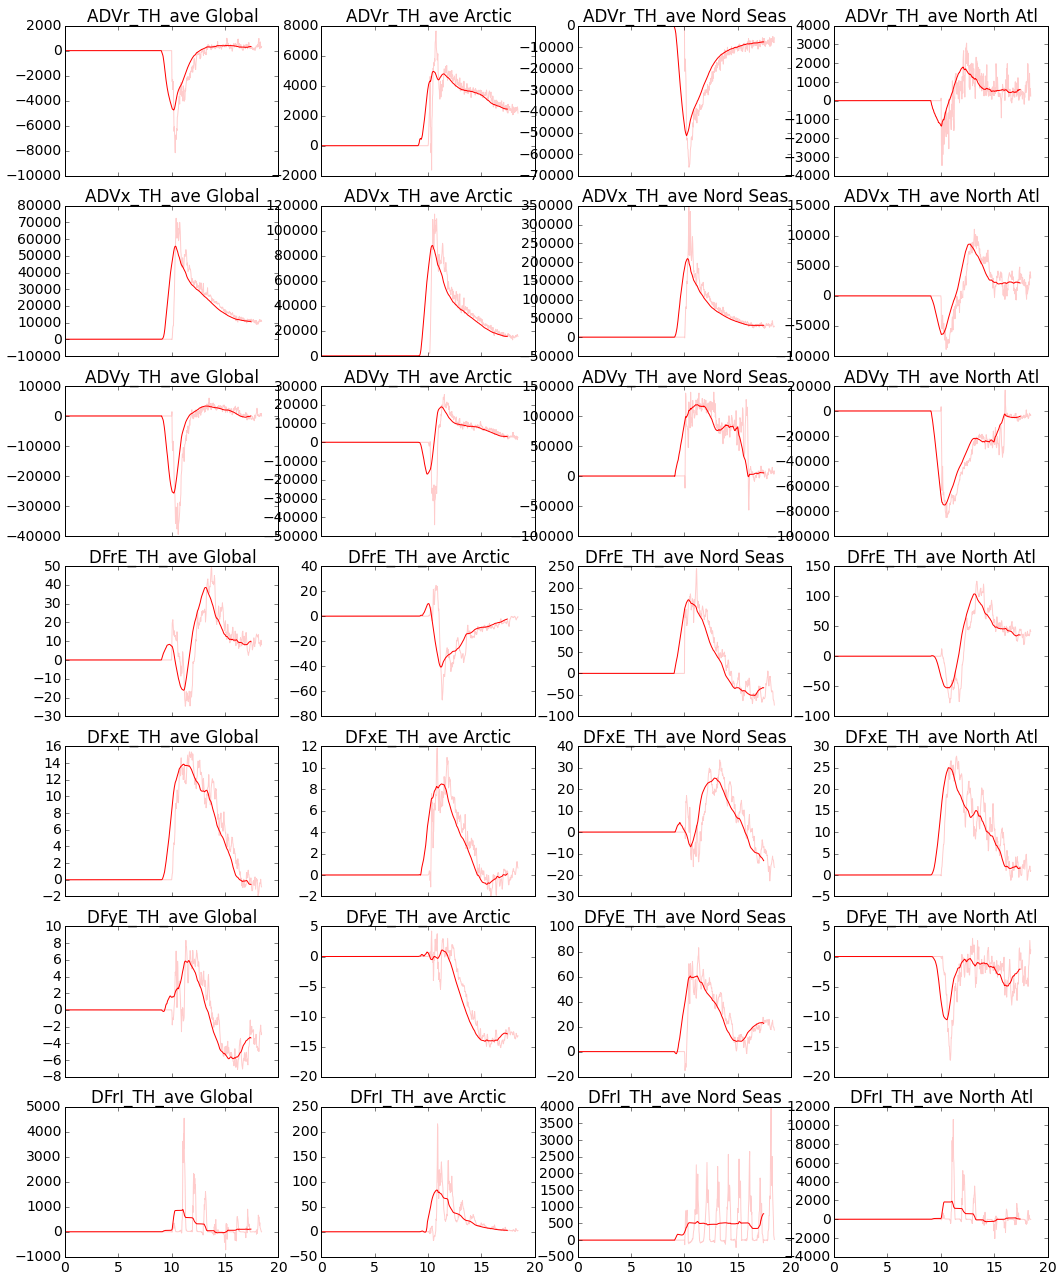

In [28]:
def plot_gad_total_diff(data_pert,data_diff,var,row=2,col=3):
    # this function is meant to plot monitor variables                         
    ax_ind = 0
    gad_list = ['ADVr','ADVx','ADVy','DFrE','DFxE','DFyE','DFrI']
    reg_title = reg_titles()
    col = len(reg_title)
    row = len(gad_list)
    fig, axes = plt.subplots(row,col, sharex=True)
    np = len(data_pert.dataDynGAD['years'])
    gad_ind = 0
    for gad in gad_list:   
        gad = gad+'_'+var+'_ave' 
        for r in range(4):    
            data = data_pert.dataDynGAD[gad][0:np,r] - data_diff.dataDynGAD[gad][0:np,r]
            axes.flat[gad_ind].plot(data_pert.dataDynGAD['years'],data,data_pert.color,alpha=0.2)
            axes.flat[gad_ind].plot(data_pert.dataDynGAD['years'][0:-36],\
                        runningMeanFast(data,36)[0:-36],data_pert.color)
            axes.flat[gad_ind].set_title(gad+' '+reg_title[r])
            #axes.flat[ax_ind + flux_ind].set_ylabel('Sv')
            #axes.flat[(row-1)*col + flux_ind].set_xlabel('Years')  
            gad_ind += 1
        #ax_ind += 1*len(gad_list)
    plt.legend(bbox_to_anchor=(-5, 6, 3.5, 1.5),ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=2.4,top=4.4)
plot_gad_total_diff(pert_const,pert_bench,'TH')
#plot_gad_total_diff(pert_const,pert_bench,'SLT')

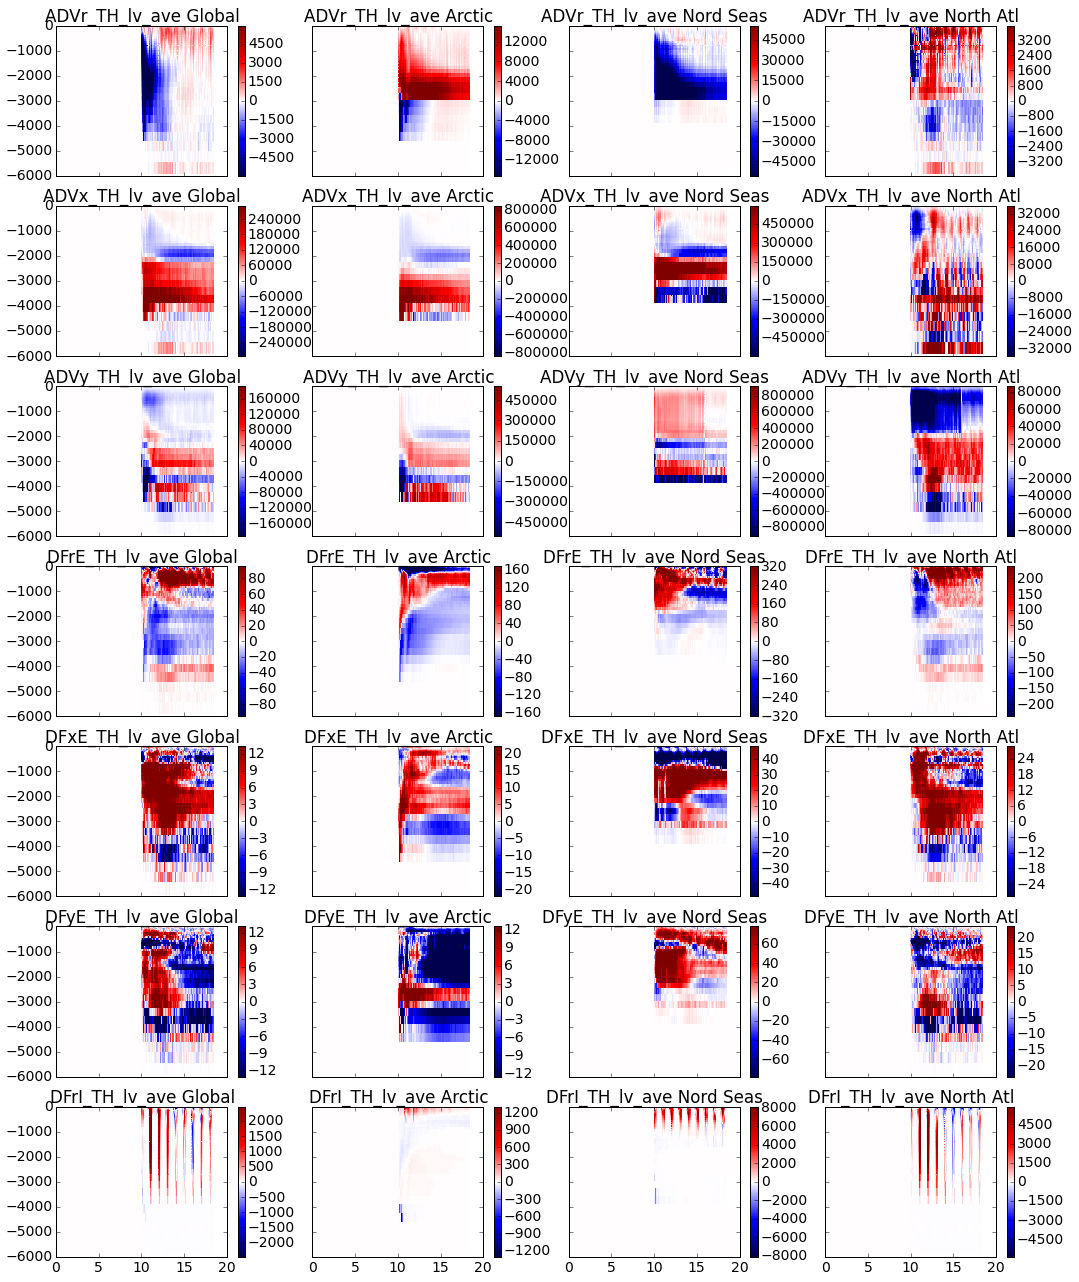

In [60]:
def plot_gad_lv_total_diff(data_pert,data_diff,var,row=2,col=3):
    # this function is meant to plot monitor variables                         
    ax_ind = 0
    gad_list = ['ADVr','ADVx','ADVy','DFrE','DFxE','DFyE','DFrI']
    reg_title = reg_titles()
    col = len(reg_title)
    row = len(gad_list)
    fig, axes = plt.subplots(row,col, sharex=True,sharey=True,)
    gad_ind = 0
    nt = len(data_pert.dataDynGAD['years'])
    for gad in gad_list:   
        gad = gad+'_'+var+'_lv_ave' 
        for r in range(4):    
            datam = (data_pert.dataDynGAD[gad][1:nt,r,:] - data_diff.dataDynGAD[gad][1:nt,r,:])
            vimax = np.nanmax(np.absolute(datam))/float(3)
            vimin = -vimax
            ca = axes.flat[gad_ind].pcolor(data_pert.dataDynGAD['years'],data_pert.Z,
                    datam.T,vmin=vimin,vmax=vimax,cmap=matplotlib.cm.seismic)
            axes.flat[gad_ind].set_title(gad+' '+reg_title[r])
            #axes.flat[gad_ind].set_xlabel('Years')
            cbar = fig.colorbar(ca , ax=axes.flat[gad_ind], )#ticks=ticks )
            gad_ind += 1
    plt.legend(bbox_to_anchor=(-5, 6, 3.5, 1.5),ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=2.4,top=4.4)
plot_gad_lv_total_diff(pert_const,pert_bench,'TH')
#plot_gad_total_diff(pert_const,pert_bench,'SLT')

In [78]:
def lit_data():
    class fluxes():
        def __init__(self):
            self.totalFluxes = {}
            self.title = []
    liq10 = fluxes()
    liq10.totalFluxes = {
             'Fram' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6 , 'FWFlux' : -47.6, 'HFlux':24.4} ,
             'Fram1' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6, 'FWFlux': -47.6, 'HFlux':24.4} ,
             'Fram2' : {'Inflow' : 3.9, 'Outflow' : -5.5, 'Total flow' : -1.6, 'FWFlux' : -47.6, 'HFlux':24.4} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9, 'FWFlux':-8.1, 'HFlux':71.6} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9, 'FWFlux':-8.1, 'HFlux':71.6} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :2.9, 'FWFlux' :-8.1, 'HFlux':71.6} ,
             'Bering': {'Inflow' : 1.3, 'Outflow' : 0.0, 'Total flow' :1.3, 'FWFlux' :95.2,'HFlux':5.4} ,
             'Davis': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6, 'FWFlux' :-123.8, 'HFlux':12.6},
             'Davis2': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6, 'FWFlux' :-123.8, 'HFlux':12.6},
             'Davis1': {'Inflow' : 0.6, 'Outflow' : -3.2, 'Total flow' :-2.6, 'FWFlux' :-123.8, 'HFlux':12.6}
            }
    liq10.color = 'blue'
    liq10.title = "Lique10"
    
    core2 = fluxes()
    core2.totalFluxes =  {
             'Fram' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : -1.95, 'FWFlux' : 0.0, 'HFlux':53.96} ,
             'Fram1' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : -1.95, 'FWFlux' : 0.0, 'HFlux':53.96} ,
             'Fram2' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : -1.95, 'FWFlux' : 0.0, 'HFlux':53.96} ,
             'Barents' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : 2.53, 'FWFlux' : 0.0, 'HFlux':22.98} ,
             'Barents1' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : 2.53, 'FWFlux' : 0.0, 'HFlux':22.98} ,
             'Barents2' : {'Inflow' : 0, 'Outflow' : 0, 'Total flow' : 2.53, 'FWFlux' : 0.0, 'HFlux':22.98} ,
             'Bering': {'Inflow' : 0, 'Outflow' :0, 'Total flow' : 0.99, 'FWFlux' : 0.0, 'HFlux': 3.39} ,
             'Davis': {'Inflow' : 0, 'Outflow' : 0, 'Total flow' :-1.75, 'FWFlux' : 0.0, 'HFlux':13.44},
             'Davis2': {'Inflow' : 0, 'Outflow' : 0, 'Total flow' :-1.75, 'FWFlux' : 0.0, 'HFlux':13.44},
             'Davis1': {'Inflow' : 0, 'Outflow' : 0, 'Total flow' :-1.75, 'FWFlux' : 0.0, 'HFlux':13.44} 
            }
    core2.title = "CORE2"

    obs = fluxes()
    obs.totalFluxes =   {'Fram' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7', 'FWFlux' : 0.0, 'HFlux':70.0} ,
             'Fram1' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7', 'FWFlux' : 0.0, 'HFlux':70.0} ,
             'Fram2' : {'Inflow' : [], 'Outflow' : [], 'Total flow' : '-2.0+/-2.7', 'FWFlux' : 0.0, 'HFlux':70.0} ,
             'Barents' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3', 'FWFlux' : 0.0, 'HFlux':'26-50'} ,
             'Barents1' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3', 'FWFlux' : 0.0, 'HFlux':'26-50'} ,
             'Barents2' : {'Inflow' : -1.2, 'Outflow' : 4.1, 'Total flow' :'2-2.3', 'FWFlux' : 0.0, 'HFlux':'26-50'} ,
             'Bering': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'0.8+/-0.2', 'FWFlux' : 0.0, 'HFlux': 0.0} ,
             'Davis': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0', 'FWFlux' : 0.0, 'HFlux':19.0},
             'Davis2': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0', 'FWFlux' : 0.0, 'HFlux':19.0},
             'Davis1': {'Inflow' : [], 'Outflow' : [], 'Total flow' :'-2.6+/-1.0', 'FWFlux' : 0.0, 'HFlux':19.0}
            }

    obs.title = "Observations"
    return liq10,core2,obs
liq10,core2,obs = lit_data()

In [89]:
#times = range(1,121,1)+range(123,243,1)+range(245,365,1)
times = range(12)
hflux = RunRead()
hflux.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_benchmark/results/')
hflux.title('No restoring','blue')
hflux.readStateData(times)
hflux.readGAD(range(0,12,1))
hflux.readDynStDiagGAD([6220800,6480000])
hflux.fluxCalc()
hflux.baroCalc()

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_benchmark/results/
Read ['ADVr_TH', 'ADVx_TH', 'ADVy_TH', 'DFrE_TH', 'DFxE_TH', 'DFyE_TH', 'DFrI_TH', 'ADVr_SLT', 'ADVx_SLT', 'ADVy_SLT', 'DFrE_SLT', 'DFxE_SLT', 'DFyE_SLT', 'DFrI_SLT']


In [95]:
def heatflux_calc_from_gad():
    class hfluxes():
        def __init__(self):
            self.totalFluxes = {}
            self.title = []
    gad = hfluxes()
    GAD = {}
    kk = 1
    GAD['Fram'] = {'HFlux' : np.nansum(np.nanmean(hflux.GAD['ADVx_TH'][0:12,:,58*kk:80*kk,76*kk],axis=0))/10**6+
                              np.nansum(np.nanmean(hflux.GAD['DFxE_TH'][0:12,:,58*kk:80*kk,76*kk],axis=0))/10**6}
    GAD['Davis'] = {'HFlux' : np.nansum(np.nanmean(hflux.GAD['ADVy_TH'][0:12,:,113*kk:135*kk,75*kk],axis=0))/10**6 +
                               np.nansum(np.nanmean(hflux.GAD['DFyE_TH'][0:12,:,113*kk:135*kk,75*kk],axis=0))/10**6}
    GAD['Denmark'] = {'HFlux' : np.nansum(np.nanmean(hflux.GAD['ADVy_TH'][0:12,:,100*kk,37*kk:48*kk],axis=0))/10**6+
                                 np.nansum(np.nanmean(hflux.GAD['DFyE_TH'][0:12,:,100*kk,37*kk:48*kk],axis=0))/10**6}
    GAD['Bering'] = {'HFlux' : np.nansum(np.nanmean(hflux.GAD['ADVy_TH'][0:12,:,80*kk:89*kk,178*kk],axis=0))/10**6 + 
                                np.nansum(np.nanmean(hflux.GAD['DFyE_TH'][0:12,:,80*kk:89*kk,178*kk],axis=0))/10**6}
    GAD['Barents'] = {'HFlux' : np.nansum(np.concatenate((\
                            np.nanmean(hflux.GAD['ADVx_TH'][0:12,:,40*kk,53*kk:68*kk],axis=0),\
                            np.nanmean(hflux.GAD['ADVy_TH'][0:12,:,40*kk:58*kk,68*kk],axis=0)),axis=1))/10**6 +
                             np.nansum(np.concatenate((\
                            np.nanmean(hflux.GAD['DFxE_TH'][0:12,:,40*kk,53*kk:68*kk],axis=0),\
                            np.nanmean(hflux.GAD['DFyE_TH'][0:12,:,40*kk:58*kk,68*kk],axis=0)),axis=1))/10**6}
    GAD['Norwice'] = {'HFlux' : np.nansum(np.concatenate((\
                            np.nanmean(hflux.GAD['ADVx_TH'][0:12,:,60*kk:95*kk,15*kk],axis=0),\
                            np.nanmean(hflux.GAD['ADVy_TH'][0:12,:,95*kk,15*kk:30*kk],axis=0)),axis=1))/10**6 +
                             np.nansum(np.concatenate((\
                            np.nanmean(hflux.GAD['DFxE_TH'][0:12,:,60*kk:95*kk,15*kk],axis=0),\
                            np.nanmean(hflux.GAD['DFyE_TH'][0:12,:,95*kk,15*kk:30*kk],axis=0)),axis=1))/10**6}
    gad.totalFluxes = GAD
    return gad
gad = heatflux_calc_from_gad()

In [96]:
cp = 4.2
for var in ['Fram','Davis','Barents','Bering']:
    print var
    print gad.totalFluxes[var]['HFlux']*cp
    print liq10.totalFluxes[var]['HFlux']
    print hflux.totalFluxes[var]['HFlux']*cp

Fram
0.591324201563
24.4
-0.462
Davis
-0.392779225781
12.6
5.418
Barents
0.370975811719
71.6
-10.962
Bering
1.22161498478
5.4
4.494


1.24767e+07 0.0
1.12476e+07 0.0
1.14146e+07 0.0
1.02649e+07 0.0
9.13294e+06 0.0
8.60629e+06 0.0


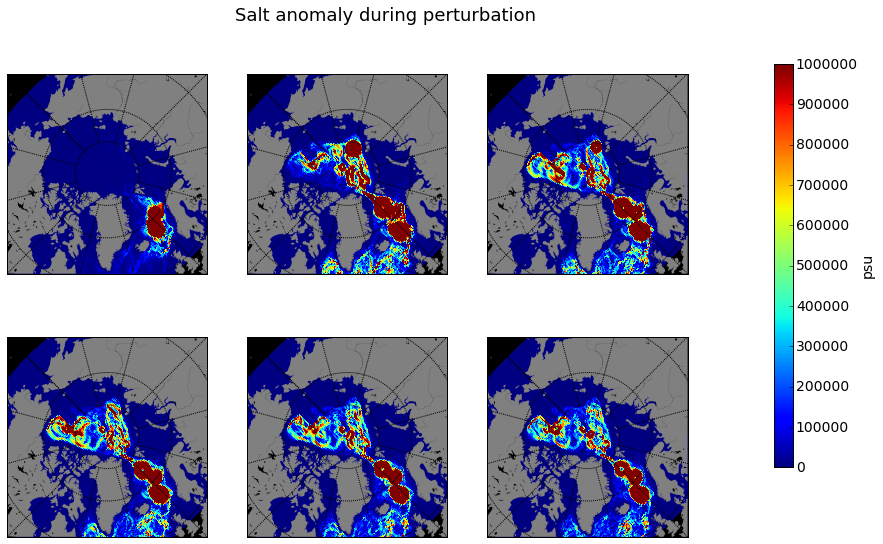

In [53]:
def basemap_diff(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    #times = [0+12*10, 1+12*10, 6+12*10, 18+12*10, 36+12*10, 72+12*10]
    times = [10,11,12,13,14,15]
    vimin = 0 ; vimax = 10**6
    cmap = matplotlib.cm.jet
    fig, axes = plt.subplots(2,3)
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='black')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='black')
        x,y=m(data_pert.lon,data_pert.lat)
        datam = np.nanmean((data_pert.GAD['ADVx_TH'] - data_diff.GAD['ADVx_TH'])[t,:,0:192,0:210],axis=0)
        datam1 = np.nanmean((data_pert.GAD['ADVy_TH'] - data_diff.GAD['ADVy_TH'])[t,:,0:192,0:210],axis=0)
        datam = np.sqrt(datam**2 + datam1**2)
        print np.nanmax(datam),np.nanmin(datam)
        sitm = np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolormesh(x,y,sitm,cmap=cmap,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        #axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Salt anomaly during perturbation",x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_diff(pert_const,pert_bench)

In [ ]:
# read the grid
grid = grid_read(36)

In [ ]:
pert_100 = { 1 : pert_const ,  2 : pert_bench }

We first plot the salinity anomaly difference between the perturbation experimet nad the control run

In [ ]:
def basemap_perturbation(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 1+12*10, 6+12*10, 18+12*10, 36+12*10, 72+12*10]
    vimin = 0 ; vimax = 10
    fig, axes = plt.subplots(2,3)
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='black')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='black')
        x,y=m(data_pert.lon,data_pert.lat)
        datam = np.nanmean((data_pert.data['S'] - data_diff.data['S'])[t,:,:,:],axis=0)
        sitm = np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolormesh(x,y,sitm,cmap=matplotlib.cm.hot,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Salt anomaly during perturbation",x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_perturbation(pert_const,pert_bench)

Most of the flux seems to go through Fram strait, very little through Barents strait or Denmark strait, we check fluxes to confirm this

Fluxes are positives for fluxes into the Arctic

In [ ]:
def plot_flux_total(monitor_list,var_list,row=2,col=3):
    # this function is meant to plot monitor variables                         
    ax_ind = 0
    row = len(var_list)
    flux_list = ['FluxSumFW','FluxSumS','FluxSumT','FluxInSum','FluxOutSum','FluxSum']
    flux_titles = {'FluxSumFW' : 'FW','FluxSumS' : 'S', 'FluxSumT':'Heat', \
                   'FluxInSum' : 'Inflow','FluxOutSum' : 'Outflow' , 'FluxSum' : 'Net flow'}
    col = len(flux_list)
    fig, axes = plt.subplots(row,col, sharex=True,)
    for var in var_list:
        flux_ind = 0
        for flux in flux_list:
            for mon in monitor_list:
                #axes.flat[ax_ind + flux_ind].plot(monitor_list[mon].fluxes['years'],\
                #    monitor_list[mon].fluxes[var][flux],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind + flux_ind].plot(monitor_list[mon].years[0:-12],\
                        runningMeanFast(monitor_list[mon].fluxes[var][flux],12)[0:-12],\
                                                  monitor_list[mon].color)
                axes.flat[ax_ind + flux_ind].set_title(var+' '+flux_titles[flux])
            axes.flat[ax_ind + flux_ind].set_ylabel('Sv')
            axes.flat[(row-1)*col + flux_ind].set_xlabel('Years')  
            flux_ind += 1
        ax_ind += 1*len(flux_list)
    plt.legend(bbox_to_anchor=(-5, 6, 3.5, 1.5),ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=2.4,top=4.4)
varlist = ['Fram1' , 'Bering' , 'Barents1','Davis1','Denmark','Norwice']
plot_flux_total(pert_100,varlist ,row=2,col=3)

In [ ]:
def plot_flux_total_diff(data_pert,data_diff,var_list,row=2,col=3):
    # this function is meant to plot monitor variables                         
    ax_ind = 0
    row = len(var_list)
    flux_list = ['FluxSumFW','FluxSumT','FluxInSum','FluxOutSum','FluxSum']
    flux_titles = {'FluxSumFW' : 'FW','FluxSumS' : 'S', 'FluxSumT':'Heat', \
                   'FluxInSum' : 'Inflow','FluxOutSum' : 'Outflow' , 'FluxSum' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    col = len(flux_list)
    fig, axes = plt.subplots(row,col, sharex=True)
    for var in var_list:
        flux_ind = 0
        for flux in flux_list:
                #axes.flat[ax_ind + flux_ind].plot(monitor_list[mon].fluxes['years'],\
                #    monitor_list[mon].fluxes[var][flux],monitor_list[mon].color,alpha=0.2)
            data = data_pert.fluxes[var][flux] - data_diff.fluxes[var][flux]
            axes.flat[ax_ind + flux_ind].plot(data_pert.years,data,data_pert.color,alpha=0.2)
            axes.flat[ax_ind + flux_ind].plot(data_pert.years[0:-12],\
                        runningMeanFast(data,12)[0:-12],data_pert.color)
            axes.flat[ax_ind + flux_ind].set_title(var_titles[var]+' '+flux_titles[flux])
            axes.flat[ax_ind + flux_ind].set_ylabel('Sv')
            axes.flat[(row-1)*col + flux_ind].set_xlabel('Years')  
            flux_ind += 1
        ax_ind += 1*len(flux_list)
    plt.legend(bbox_to_anchor=(-5, 6, 3.5, 1.5),ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=2.4,top=4.4)
varlist = ['Fram1' , 'Barents1','Davis1','Denmark']
plot_flux_total_diff(pert_const,pert_bench,varlist ,row=2,col=3)

In [ ]:
# plot layers
def plot_total_flux(data_pert,data_diff,flux,row=2,col=2):
    # this function is meant to plot monitor variables   
    ax_ind = 0
    fluxes = ['Flux','FluxFW','FluxT']
    variables = ['Fram','Barents','Davis','Denmark']
    flux_titles = {'FluxFW' : 'FW','FluxS' : 'S', 'FluxT':'Heat', \
                   'FluxIn' : 'Inflow','FluxOut' : 'Outflow' , 'Flux' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    fig, axes = plt.subplots(len(fluxes),len(variables),sharex=True)
    for flux in fluxes:
        for var in variables:
            colormap = cmocean.cm.CDOM
            colors = [colormap(i) for i in np.linspace(0, 1,50)]
            for k in range(49,0,-1):    
                data = np.nanmean((data_pert.fluxes[var][flux]-data_diff.fluxes[var][flux])[:,k,:],axis=1)
                axes.flat[ax_ind].plot(data_pert.years[0:-12],runningMeanFast(data,12)[0:-12],color=colors[k])
            axes.flat[ax_ind].set_title(var + flux )
            axes.flat[ax_ind].set_ylabel('Sv')
            axes.flat[ax_ind].set_title(var_titles[var]+' '+flux_titles[flux])
            ax_ind += 1
    fig.subplots_adjust(right=2.3,top=2.3)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plot_total_flux(pert_const,pert_bench,'Flux',row=1,col=1)

Strong fluxes mostly through Fram strait, both incoming and outcoming

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
def strait_flux(data_pert,data_diff,flux):
    fluxes = {'Fram' : [[58,80],76] , 'Davis' : [[113,135],75] , 'Denmark' : [100,[37,48]] }
    ind = 0
    times = [0+12*10, 1+12*10, 6+12*10, 18+12*10, 36+12*10, 72+12*10]
    variables = ['S','T','U']
    cmaps = {'S' : cmocean.cm.salinity, 'T' : cmocean.cm.temperature , 'U' : matplotlib.cm.seismic}
    vmins = {'S' : 33, 'T' :-2 , 'U' : -1 }
    vmaxs = {'S' : 38, 'T' : 8, 'U' : 1}
    kres = {36:1,18:2,9:9}
    k = kres[data_pert.res]
    fig, axes = plt.subplots(len(variables),len(times),sharex='col', sharey='row')        
    for var in variables:
        for t in times:
            CS = axes.flat[ind].contourf(data_pert.X[58*k:80*k],data_pert.Z[0:30],data_pert.data[var][6+12*10,0:30,58*k:80*k,76*k],
                    vmin=vmins[var],vmax=vmaxs[var],cmap = cmaps[var])    
            axes.flat[ind].contourf(data_pert.X[58*k:80*k],data_pert.Z[0:30],data_pert.data[var][t,0:30,58*k:80*k,76*k],
                    vmin=vmins[var],vmax=vmaxs[var],cmap = cmaps[var])            
            axes.flat[ind].set_title(var+str(round(data_pert.years[t],2)))
            axes.flat[ind].title.set_fontsize('14')
            ind += 1

        div = make_axes_locatable(axes.flat[ind-1])
        cax = div.append_axes("right", size="10%", pad=0.05)
        cbar = plt.colorbar(CS, cax=cax, format="%.2g")
        cbar.set_label(var, size=10)
        #cbar_ax = fig.add_axes([2.15, 0.2, 0.045, 0.7])
        #cbar = plt.colorbar(CS, cax=cbar_ax,ticks=[26.0,26.5,27.0,27.5,28.0,28.5,29])
        #cbar.axes.set_ylabel(r'$kg/m^3$')
    
    #plt.tight_layout()        
    fig.subplots_adjust(right=2.1,top=3.)
strait_flux(pert_const,pert_const,'Fram')

Effect on the freshwater transport and freshwater content

In [ ]:
def plot_flux_total_diff(data_pert,data_diff,var_list):
    # this function is meant to plot monitor variables                         
    ax_ind = 0
    row = len(var_list)
    #flux_list = ['FluxSumFW','FluxSumT','FluxInSum','FluxOutSum','FluxSum']
    flux_list = ['FluxSumFW','FluxSum']
    flux_titles = {'FluxSumFW' : 'FW','FluxSumS' : 'S', 'FluxSumT':'Heat', \
                   'FluxInSum' : 'Inflow','FluxOutSum' : 'Outflow' , 'FluxSum' : 'Net flow'}
    var_titles = {'Fram' : 'Fram' , 'Fram1' : 'Fram' , 'Fram2' : 'Fram' , 
                  'Davis': 'Davis' , 'Davis1': 'Davis' , 'Davis2': 'Davis',
                 'Denmark' : 'Denmark' , 'Bering' : 'Bering' , 'Norwice' : 'Norwice' ,
                 'Barents' : 'Barents' , 'Barents1' : 'Barents' , 'Barents2' : 'Barents'}
    col = len(flux_list)
    fig, axes = plt.subplots(row,col, sharex=True)
    for var in var_list:
        flux_ind = 0
        for flux in flux_list:
                #axes.flat[ax_ind + flux_ind].plot(monitor_list[mon].fluxes['years'],\
                #    monitor_list[mon].fluxes[var][flux],monitor_list[mon].color,alpha=0.2)
            data = data_pert.fluxes[var][flux] - data_diff.fluxes[var][flux]
            axes.flat[ax_ind + flux_ind].plot(data_pert.years,data,data_pert.color,alpha=0.2)
            axes.flat[ax_ind + flux_ind].plot(data_pert.years[0:-12],\
                        runningMeanFast(data,12)[0:-12],data_pert.color)
            axes.flat[ax_ind + flux_ind].set_title(var_titles[var]+' '+flux_titles[flux])
            axes.flat[ax_ind + flux_ind].set_ylabel('Sv')
            axes.flat[(row-1)*col + flux_ind].set_xlabel('Years')  
            flux_ind += 1
        ax_ind += 1*len(flux_list)
    plt.legend(bbox_to_anchor=(-5, 6, 3.5, 1.5),ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=1.4,top=1.1)
varlist = ['Fram1']
plot_flux_total_diff(pert_const,pert_bench,varlist)

#Freshwater content in Arctic and Nordic Seas

Now we want to study more in the details the changes in freshwater content cause by the perturbation.

First of all we want to make sure the perturbation itself is not generating changes in freshwater content, i.e. adding salt is not interfering with the "fresher" part of the water column.

We have 2 ways to calculate the freshwater difference:

--- (dashed) Calculate the difference in freshwater content in points were both have freshwater (zero everywhere else)

... (dotted) Calculate the difference in every freshater point either of the two have freshwater

In [ ]:
def plot_freshwater_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))
        for method in ['all','few']:           
            if method == 'all':
                trumax = np.zeros_like(data_diff.data['S']);
                trumax[data_diff.data['S']<34.8] = 1;
                trumax[data_pert.data['S']<34.8] = 1
                data = np.array(data_pert.data['S'])
                data1 = np.array(data_diff.data['S'])
                data[trumax==0] = 0;data1[trumax==0] = 0        
                datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc
                datam[trumax==0] = 0

            elif method == 'few':
                trumax = np.zeros_like(data_diff.data['S']);
                trumax[data_diff.data['S']>34.8] = 1;
                trumax[data_pert.data['S']>34.8] = 1
                data = np.array(data_pert.data['S'])
                data1 = np.array(data_diff.data['S'])
                data[trumax==1] = 0;data1[trumax==1] = 0
                datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc
                datam[trumax==1] = 0
                
            datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
            colormap = matplotlib.cm.jet 
            colors = [colormap(i) for i in np.linspace(0, 1,40)]
            for k in range(0,40):
                #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
                if (k %5 == 0) & (method=='few'):
                    axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                              color=colors[k],linestyle=ls[method],label=data_pert.Z[k])
                else:
                    axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                              color=colors[k],linestyle=ls[method])

        axes.flat[j].set_title('FW '+titles[j]+' '+str(data_pert.Z[0])+'-'+str(data_pert.Z[40]))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_freshwater_content(pert_const,pert_bench)

In [ ]:
def plot_freshwater_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))     
        data = np.array(data_pert.data['S'])
        data1 = np.array(data_diff.data['S'])
        datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc            
        datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
        colormap = matplotlib.cm.jet 
        colors = [colormap(i) for i in np.linspace(0, 1,30)]
        for k in range(0,30):
            #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
            if (k %4 == 0):
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                          color=colors[k],label=data_pert.Z[k])
            else:
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                          color=colors[k])

        axes.flat[j].set_title('FW '+titles[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_freshwater_content(pert_const,pert_bench)

In [ ]:
def plot_freshwater_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))
        for method in ['all','few']:           
            if method == 'all':
                trumax = np.zeros_like(data_diff.data['S']);
                trumax[data_diff.data['S']<34.8] = 1;
                trumax[data_pert.data['S']<34.8] = 1
                data = np.array(data_pert.data['S'])
                data1 = np.array(data_diff.data['S'])
                data[trumax==0] = 0;data1[trumax==0] = 0        
                datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc
                datam[trumax==0] = 0

            elif method == 'few':
                trumax = np.zeros_like(data_diff.data['S']);
                trumax[data_diff.data['S']>34.8] = 1;
                trumax[data_pert.data['S']>34.8] = 1
                data = np.array(data_pert.data['S'])
                data1 = np.array(data_diff.data['S'])
                data[trumax==1] = 0;data1[trumax==1] = 0
                datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc
                datam[trumax==1] = 0
                
            datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
            colormap = matplotlib.cm.jet 
            colors = [colormap(i) for i in np.linspace(0, 1,40)]
            for k in range(0,40):
                #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
                if (k %5 == 0) & (method=='few'):
                    axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(
                            np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                              color=colors[k],linestyle=ls[method],label=data_pert.Z[k])
                else:
                    axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(
                            np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                              color=colors[k],linestyle=ls[method])                    
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
        axes.flat[j].set_title('FW '+titles[j]+' '+str(data_pert.Z[0])+'-'+str(data_pert.Z[40]))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_freshwater_content(pert_const,pert_bench)

In [ ]:
def plot_freshwater_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))     
        data = np.array(data_pert.data['S'])
        data1 = np.array(data_diff.data['S'])
        datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc            
        datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
        colormap = matplotlib.cm.jet 
        colors = [colormap(i) for i in np.linspace(0, 1,30)]
        for k in range(0,30):
            #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
            if (k %4 == 0):
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                          color=colors[k],label=data_pert.Z[k])
            else:
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                          color=colors[k])

        axes.flat[j].set_title('FW '+titles[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_freshwater_content(pert_const,pert_bench)

In [ ]:
def plot_freshwater_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    fig , axes = plt.subplots(2,4,sharex=True)
    k = 1
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))
        maskcalc = np.tile(areamasks[j],(data_pert.data['S'].shape[0],1,1,1))     
        data = np.array(data_pert.data['S'])
        data1 = np.array(data_diff.data['S'])
        datam = ((1 - data/34.8) - (1 - data1/34.8))*maskcalc            
        datapl1 = np.nansum(np.nansum((1-data/34.8)*maskcalc ,axis=3),axis=2)
        datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
        colormap = matplotlib.cm.jet 
        colors = [colormap(i) for i in np.linspace(0, 1,30)]
        if (k %5 == 0):
            axes.flat[j+4].plot(data_pert.years[0:-12],runningMeanFast(
                    np.nansum(datapl[:,0:30],axis=1),12)[0:-12]/10**9,
                      color=colors[k],label=data_pert.Z[k])
        else:
            axes.flat[j+4].plot(data_pert.years[0:-12],runningMeanFast(
                    np.nansum(datapl[:,0:30],axis=1),12)[0:-12]/10**9,color=colors[k]) 
        axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(
                np.nansum(datapl1[:,0:30],axis=1),12)[0:-12]/10**9,color=colors[k])
        
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
        axes.flat[j].set_title('FW '+titles[j])
        
        axes.flat[j+4].set_ylabel(r'$km^3$')
        axes.flat[j+4].set_xlabel('Years')
        axes.flat[j+4].set_title('FW '+titles[j]+' diff')
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)

    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_freshwater_content(pert_const,pert_bench)

In [ ]:
# We plot seaice
def basemap_freshwater(data_pert,data_diff,method):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    vimin = -20.0 ; vimax = 20
    fig, axes = plt.subplots(2,3)
    
    depth = np.tile([grid['Zp']],(len(data_pert.X),len(data_pert.Y),1))
    depth = np.swapaxes(depth,0,2) 
    
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)

        if method == 'all':
            trumax = np.zeros_like(data_diff.data['S'][t,:,:,:]);
            trumax[data_diff.data['S'][t,:,:,:]<34.8] = 1;
            trumax[data_pert.data['S'][t,:,:,:]<34.8] = 1
            data = np.array(data_pert.data['S'][t,:,:,:])
            data1 = np.array(data_diff.data['S'][t,:,:,:])
            data[trumax==0] = 0;data1[trumax==0] = 0        
            depth1 = np.array(depth)
            depth1[trumax==0] = 0
            datam = np.nansum((1 - data[:,:,:]/34.8)*depth,axis=0) - np.nansum((1 - data1[:,:,:]/34.8)*depth,axis=0)
        elif method == 'few':
            trumax = np.zeros_like(data_diff.data['S'][t,:,:,:]);
            trumax[data_diff.data['S'][t,:,:,:]>34.8] = 1;
            trumax[data_pert.data['S'][t,:,:,:]>34.8] = 1
            data = np.array(data_pert.data['S'][t,:,:,:])
            data1 = np.array(data_diff.data['S'][t,:,:,:])
            data[trumax==1] = 0;data1[trumax==1] = 0
            depth1 = np.array(depth)
            depth1[trumax==1] = 0
            datam = np.nansum((1 - data[:,:,:]/34.8)*depth,axis=0) - np.nansum((1 - data1[:,:,:]/34.8)*depth,axis=0)
                 
        sitm = datam
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.seismic,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Freshwater content difference"+" "+method,x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_freshwater(pert_const,pert_bench,'all')
basemap_freshwater(pert_const,pert_bench,'few')

In [ ]:
# We plot seaice
def basemap_freshwater(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    vimin = -20.0 ; vimax = 20
    fig, axes = plt.subplots(2,3)
    
    depth = np.tile([grid['Zp']],(len(data_pert.X),len(data_pert.Y),1))
    depth = np.swapaxes(depth,0,2) 
    
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)

        data = np.array(data_pert.data['S'][t,:,:,:])
        data1 = np.array(data_diff.data['S'][t,:,:,:])    
        datam = np.nansum((1 - data[0:29,:,:]/34.8)*depth[0:29,:,:],axis=0) - \
                np.nansum((1 - data1[0:29,:,:]/34.8)*depth[0:29,:,:],axis=0)
                 
        sitm = datam
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.seismic,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Freshwater content top 1000m difference",x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_freshwater(pert_const,pert_bench)

In [ ]:
# We plot seaice
def basemap_freshwater(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    vimin = 0.0 ; vimax = 20.0
    fig, axes = plt.subplots(2,3)


    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)    
        
        data = np.array(data_pert.data['S'])
        data1 = np.array(data_diff.data['S'])    
        depth = np.tile([grid['Zp']],(len(data_pert.X),len(data_pert.Y),1))
        depth = np.swapaxes(depth,0,2)        
        depth[data[t,:,:,:]>34.8] = 0
        data[data>34.8] = 0
    
        datam = np.nansum((1 - data[t,:,:,:]/34.8)*depth,axis=0)
        sitm = datam
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.jet,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Freshwater content",x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_freshwater(pert_const,pert_bench)

In [ ]:
# We plot seaice
def basemap_freshwater(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    vimin = -20.0 ; vimax = 20.0
    fig, axes = plt.subplots(2,3)


    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)    
        
        data = np.array(data_pert.data['S'])
        data1 = np.array(data_diff.data['S'])    
        depth = np.tile([grid['Zp']],(len(data_pert.X),len(data_pert.Y),1))
        depth = np.swapaxes(depth,0,2)        

        datam = np.nansum((1 - data[t,0:29,:,:]/34.8)*depth[0:29,:,:],axis=0)
        sitm = datam
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.jet,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle("Freshwater content",x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_freshwater(pert_const,pert_bench)

# Seaice

We look at the seaice to see if the excess in freshwater could be caused by a decrease in seaice

In [ ]:
def basemap_seaice_diff(data_pert,data_diff,var):
    vimind = {'SIheff' : -3, 'SIarea' : -1 , 'SIhsnow' : -0.5 , 'SIhsalt' : -32973}
    vimaxd = {'SIheff' : 3, 'SIarea' : 1, 'SIhsnow' : 0.5, 'SIhsalt' : 32973}
    titlesd = {'SIheff' : "Seaice ice thickness", 'SIarea' : "Seice area fraction", \
               'SIhsnow' : "Seaice snow thickness", 'SIhsalt' :"Freshwater content difference" }

    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    fig, axes = plt.subplots(2,3)
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)
        datam = data_pert.seaice[var][t,:,:] - data_diff.seaice[var][t,:,:]
        sitm = datam 
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.seismic,vmin=vimind[var],vmax=vimaxd[var])
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle(titlesd[var],x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)    
    
basemap_seaice_diff(pert_const,pert_bench,'SIheff')
basemap_seaice_diff(pert_const,pert_bench,'SIarea')
basemap_seaice_diff(pert_const,pert_bench,'SIhsnow')
basemap_seaice_diff(pert_const,pert_bench,'SIhsalt')

In [ ]:
times = range(0,3000)
print times[0:-20:1000]

In [ ]:
def plot_seaice(data_pert,data_diff):
    variables = ['seaice_area_mean' , 'seaice_heff_mean','seaice_hsnow_mean','seaice_hsalt_mean']
    titles = {'seaice_area_mean' : 'Seaice Fraction Covered', 'seaice_heff_mean' : 'Seaice Ice Tickness',
              'seaice_hsnow_mean' : 'Seaice Snow Tickness', 'seaice_hsalt_mean' : 'Seaice Salt Content'}
    fig , axes = plt.subplots(2,4)
    nt = len(data_pert.data['time_years_ice'])
    for j in range(4):    
        data = data_pert.data[variables[j]][0:nt]
        axes.flat[j].plot(data_diff.data['time_years_ice'][0:nt],data,alpha=0.2,color='b')
        axes.flat[j].plot(data_diff.data['time_years_ice'][0:nt],runningMeanFast(data,36)[0:nt],color='b')
        axes.flat[j].set_title(titles[variables[j]])
        
    for k in range(4):
        j = k + 4
        data = data_pert.data[variables[k]][0:nt] - data_diff.data[variables[k]][0:nt]
        axes.flat[j].plot(data_diff.data['time_years_ice'][0:nt],data,alpha=0.2,color='b')
        axes.flat[j].plot(data_diff.data['time_years_ice'][0:nt],runningMeanFast(data,36)[0:nt],color='b')
        axes.flat[j].set_title(titles[variables[k]]+' diff')   
    fig.subplots_adjust(right=2.8,top=2.6)
        
plot_seaice(pert_const,pert_bench)

In [ ]:
def basemap_mxldepth(data_pert,data_diff):
    lat_ts=90.0 ; lat_0=90.0 ; lon_0=-45.0 ;sgn=1
    width=7000000. ; height=7000000.0
    ind = 0
    times = [0+12*10, 12+12*10, 24+12*10, 36+12*10, 48+12*10, 72+12*10]
    vimin = -400 ; vimax = 400
    fig, axes = plt.subplots(2,3)
    for t in times:
        m = Basemap(ax=axes.flat[ind],width=width,height=height,resolution='l',\
                    projection='stere',lat_ts=lat_ts,lat_0=lat_0,lon_0=lon_0)
        # the continents will be drawn on top.
        m.drawmapboundary(fill_color='white')
        # fill continents, set lake color same as ocean color.
        m.fillcontinents(color='grey',lake_color='white')
        x,y=m(data_pert.lon,data_pert.lat)
        datam = data_pert.mxldepth[t,:,:] - data_diff.mxldepth[t,:,:]
        sitm = datam 
        np.ma.masked_where(np.isnan(datam),datam)
        CS=m.pcolor(x,y,sitm,cmap=matplotlib.cm.seismic,vmin=vimin,vmax=vimax)
        m.drawparallels(np.arange(-80.,81.,15.))
        m.drawmeridians(np.arange(-180.,181.,30.))
        axes.flat[ind].set_title('Pert at '+str(round(data_pert.years[t]-10,2))+'yrs')
        ind += 1
    fig.suptitle('Mixed layer depth',x=1.,y=2.,fontsize=18)
    cbar_ax = fig.add_axes([1.9, 0.4, 0.045, 1.4])
    cbar = plt.colorbar(CS, cax=cbar_ax,)
    cbar.ax.set_ylabel(r'psu')
    fig.subplots_adjust(right=1.7,top=1.8)   
basemap_mxldepth(pert_const,pert_bench)

In [ ]:
def plot_mxldepth(data_pert,data_diff):
    reg_title = reg_titles()
    fig , axes = plt.subplots(2,4)
    for j in range(len(reg_title)):
        data = data_pert.mxldepth_mean[j]
        axes.flat[j].plot(data_pert.mxldepth_years,data,alpha=0.2,color='b')
        axes.flat[j].plot(data_pert.mxldepth_years[0:-12],runningMeanFast(data,12)[0:-12],color='b')
        axes.flat[j].set_title('Mxldpeht'+' '+reg_title[j])   
        
        
        data = data_pert.mxldepth_mean[j] - data_diff.mxldepth_mean[j]
        axes.flat[j+4].plot(data_pert.mxldepth_years,data,alpha=0.2,color='b')
        axes.flat[j+4].plot(data_pert.mxldepth_years[0:-12],runningMeanFast(data,12)[0:-12],color='b')
        axes.flat[j+4].set_title('Mxldpeht'+' '+reg_title[j]+' diff')   
    fig.subplots_adjust(right=2.8,top=2.6)
        
plot_mxldepth(pert_const,pert_bench)

## Heat content evolution per layer per region

In [ ]:
def plot_heat_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['T'].shape[0],1,1,1))     
        data = np.array(data_pert.data['T'])
        data1 = np.array(data_diff.data['T'])
        datam = (data - data1)*maskcalc            
        datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
        colormap = matplotlib.cm.jet 
        colors = [colormap(i) for i in np.linspace(0, 1,30)]
        for k in range(0,30):
            #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
            if (k %4 == 0):
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                          color=colors[k],label=data_pert.Z[k])
            else:
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(datapl[:,k],12)[0:-12]/10**9,
                          color=colors[k])

        axes.flat[j].set_title('HC '+titles[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_heat_content(pert_const,pert_bench)

In [ ]:
def plot_heat_content(data_pert,data_diff):
    grid = grid_read(data_pert.res)
    mask1,mask2,mask3 = region_mask(data_pert.res)
    mask0 = np.ones_like(mask1)
    areamasks = {0:mask0*grid['Area'] , 1 : mask1*grid['Area'] , 2 : mask2*grid['Area'] , 3 : mask3*grid['Area'] }
    titles = {0 : 'Global' , 1 :'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atlantic'}
    ls = {'all' : ':' , 'few' : '--'}
    fig , axes = plt.subplots(2,2,sharex=True)
    for j in range(4):        
        maskcalc = np.tile(areamasks[j],(data_pert.data['T'].shape[0],1,1,1))     
        data = np.array(data_pert.data['T'])
        data1 = np.array(data_diff.data['T'])
        datam = (data - data1)*maskcalc            
        datapl = np.nansum(np.nansum(datam[:,:,:,:],axis=3),axis=2)
        colormap = matplotlib.cm.jet 
        colors = [colormap(i) for i in np.linspace(0, 1,30)]
        for k in range(0,30):
            #axes.flat[j].plot(data_pert.years,datapl[:,k],alpha=0.2,color='b')
            if (k %4 == 0):
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                          color=colors[k],label=data_pert.Z[k])
            else:
                axes.flat[j].plot(data_pert.years[0:-12],runningMeanFast(np.nansum(datapl[:,0:k],axis=1),12)[0:-12]/10**9,
                          color=colors[k])

        axes.flat[j].set_title('HC '+titles[j])
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        axes.flat[j].set_ylabel(r'$km^3$')
        axes.flat[j].set_xlabel('Years')
    fig.subplots_adjust(right=1.8,top=1.8)
        
plot_heat_content(pert_const,pert_bench)

In [ ]:
plot_lv(pert_100,'theta_lv_mean',1,-1,7,cmocean.cm.temperature)

In [ ]:
plot_lv(pert_100,'salt_lv_mean',0,32,37,cmocean.cm.salinity)
#plot_lv(pert_70,'salt_lv_mean',0,32,37,cmocean.cm.salinity)

In [ ]:
plot_lv(pert_100,'rho_lv_mean',0,1026,1040,cmocean.cm.density)
#plot_lv(pert_70,'rho_lv_mean',0,1026,1040,cmocean.cm.density)

In [ ]:
plot_lv(pert_100,'ke_lv_mean',0,0,0.05,cmocean.cm.chlorophyll)
#plot_lv(pert_70,'ke_lv_mean',0,0,0.05,cmocean.cm.chlorophyll)

In [ ]:
plot_lv(pert_100,'uvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)
#plot_lv(pert_70,'uvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

In [ ]:
plot_lv(pert_100,'vvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)
#plot_lv(pert_70,'vvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

In [ ]:
plot_dynSt(pert_100,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],'all')
#plot_dynSt(pert_100,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],'all')

In [ ]:
plot_dynSt(pert_100,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],0)
#plot_dynSt(pert_100,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],0)

In [ ]:
plot_dynSt(pert_100,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],1)
#plot_dynSt(pert_100,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],1)

In [ ]:
plot_dynSt(pert_100,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],2)
#plot_dynSt(pert_100,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],2)

In [ ]:
plot_dynSt(pert_100,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],3)
#plot_dynSt(pert_100,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],3)

In [ ]:
#plot_psi(pert_100,-1,7,matplotlib.cm.jet)

In [ ]:
plot_mxldepth(pert_100,0)
plot_mxldepth(pert_100,1)
plot_mxldepth(pert_100,2)
plot_mxldepth(pert_100,3)

In [ ]:
pert = {0 : pert_const , 1 : pert_bench}

In [ ]:
varlist = ['Fram1' , 'Bering' , 'Barents1','Davis1','Denmark','Norwice']
plot_flux_in_out(pert,varlist,'FluxSum',row=2,col=3)

In [ ]:
varlist = ['Fram1' , 'Bering' , 'Barents1','Davis1','Denmark','Norwice']
plot_flux(pert,varlist,'FluxSum')

In [ ]:
plot_flux(pert,varlist,'FluxInSum')

In [ ]:
plot_flux(pert,varlist,'FluxOutSum')

In [ ]:
plot_flux(pert,varlist,'FluxSumS')

In [ ]:
plot_flux(pert,varlist,'FluxSumT')

In [ ]:
plot_flux(pert,varlist,'FluxSumFW')

In [ ]:
varlist = ['Fram1' , 'Bering' , 'Barents1','Davis1','Denmark','Norwice']
plot_flux_total(pert,varlist,row=2,col=3)

In [ ]:
# this plots the sums of various flows
def plot_total_flux(monitor_list,var_list,flux,row=2,col=2):
    # this function is meant to plot monitor variables   
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for mon in monitor_list:
        sumtoplot = 0
        for var in var_list:
            sumtoplot = sumtoplot + monitor_list[mon].fluxes[var][flux]
        
        
            axes.flat[ax_ind].plot(monitor_list[mon].fluxes['years'],sumtoplot,\
                                monitor_list[mon].color,alpha=0.3)
            
            axes.flat[ax_ind].plot(monitor_list[mon].fluxes['years'][0:-12],\
                    runningMeanFast(sumtoplot,12)[0:-12],\
                               monitor_list[mon].color,label = monitor_list[mon].title)
        axes.flat[ax_ind].set_title(monitor_list[mon].title)
        axes.flat[ax_ind].set_ylabel('Sv')
        axes.flat[ax_ind].set_xlabel('Yers')
        ax_ind += 1
    #plt.legend(bbox_to_anchor=(-2.5, 1.02, 2., 1.5),
    #               ncol=4, mode="expand", borderaxespad=0.)
    fig.subplots_adjust(right=2.4,top=2.4)

plot_total_flux(pert_100,varlist,'FluxSum')

In [ ]:
grid = grid_read(36)

In [ ]:
def interact(field,cmap1,vimin1,vimin2,vimax1,vimax2,time1,time2):
    def plot_field2(vimin=1,vimax=20,time=0,Z=0):
        # This function plots a 2D field, the field is meant to have NaNs on the land place                                                
        # vimin is the minimun, vimax is the maximum, setbad is the NaN color, unity is the unity in the colorbar                          
        # cmap is a colomap                                                                                                               
        fig,axes = plt.subplots(1,1)
        masked_array = np.ma.array(field[time,Z,:,:], mask=np.isnan(field[time,Z,:,:]))
        cmap= cmap1
        cmap.set_bad('grey',1.)
        ca = plt.imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',\
                                       cmap = cmap ,origin="left",aspect='auto')
        ca = plt.pcolor(pert_const.X,pert_const.Y,masked_array,vmin = vimin, vmax = vimax,cmap = cmap)
        cbar = fig.colorbar(ca )
        fig.subplots_adjust(right=2.4,top=2)
        return plot_field2
        
    w = interactive(plot_field2,vimin=(vimin1,vimin2),vimax=(vimax1,vimax2),time=(time1,time2),Z=(time1,time2))
    display(w)
interact(pert_const.ptracers['nordicseas_50m'][:,:,:,:],matplotlib.cm.hot,-1,0,0,100,time1=0,time2=50)

In [ ]:
# this function plots different angles of ptracers                                                                                  
def plot_ptracer(data,ptracer,timings):
    ax_ind = 0
    col = 3
    row = len(timings)
    fig, axes = plt.subplots(row,col)
    vimin = 0.1
    vimax = 100

    cmap= matplotlib.cm.hot
    cmap.set_bad('grey',1.)

    for t in timings:
        masked_array = np.ma.array(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=0),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=0)))
        ca = axes.flat[ax_ind*col ].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',\
                                       cmap = cmap ,origin="left",aspect='auto',norm = matplotlib.colors.LogNorm())

        masked_array = np.ma.array(np.nanmean(data.ptracers[ptracer][t,:,:,0:200],axis=1),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,0:200],axis=1)))
        ca = axes.flat[ax_ind*col +1].pcolormesh(data.X[0:200],data.Z,masked_array,vmin = vimin, vmax = vimax,cmap=cmap,
                                                 norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col+1].set_title("Perturbation "+ptracer+" after "+str(round(data.ptracers['years'][t],2))+" years")

        masked_array = np.ma.array(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=2),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=2)))
        ca = axes.flat[ax_ind*col + 2].pcolormesh(data.Y,data.Z,masked_array,vmin = vimin, vmax = vimax, cmap=cmap,
                                              norm = matplotlib.colors.LogNorm())
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind*col + 2])

        ax_ind += 1
    fig.subplots_adjust(right=2.4,top=5.8)


In [ ]:
pert_iter = [0 + 10 ,2+ 10,6+ 10,9+ 10,19+ 10]

In [ ]:
plot_ptracer(pert_const,'perturbation',pert_iter )

In [ ]:
plot_ptracer(pert_const,'nordicseas_50m',pert_iter)

In [ ]:
plot_ptracer(pert_const,'nordicseas_1_500m',pert_iter )

In [ ]:
plot_ptracer(pert_const,'nordicseas_600_800m',pert_iter )

In [ ]:
plot_ptracer(pert_const, 'arctic_50m',pert_iter)

In [ ]:
plot_ptracer(pert_const,'arctic_1_500m',pert_iter )

In [ ]:
plot_ptracer(pert_const,'arctic_600_800m' ,pert_iter)

In [ ]:
plot_ptracer(pert_const,'fram',pert_iter )

In [ ]:
plot_ptracer(pert_const,'davis',pert_iter )

In [ ]:
# this function plots different angles of ptracers
def plot_ptracer_diff_bench(data,data_diff,ptracer,timings):
    ax_ind = 0
    col = 3
    row = len(timings)
    fig, axes = plt.subplots(row,col)
    vimin = 0.1
    vimax = 100
    
    cmap= matplotlib.cm.hot
    cmap.set_bad('grey',1.)
    
    diff = data.ptracers[ptracer][:,:,:,:]-data_diff.ptracers[ptracer][:,:,:,:]
    diff[diff<0.001] = 0.001
    
    for t in timings:
        masked_array = np.ma.array(np.nanmean(diff[t,:,:,:],axis=0),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=0)))
        ca = axes.flat[ax_ind*col ].imshow(masked_array,vmin = vimin, vmax = vimax, interpolation='nearest',\
                                       cmap = cmap ,origin="left",aspect='auto',norm = matplotlib.colors.LogNorm())

        masked_array = np.ma.array(np.nanmean(diff[t,:,:,0:200],axis=1),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,0:200],axis=1)))
        ca = axes.flat[ax_ind*col +1].pcolormesh(data.X[0:200],data.Z,masked_array,vmin = vimin, vmax = vimax,\
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col+1].set_title("Perturbation "+ptracer+" after "+str(round(data.ptracers['years'][t],2))+" years")
        
        masked_array = np.ma.array(np.nanmean(diff[t,:,:,:],axis=2),\
                                   mask=np.isnan(np.nanmean(data.ptracers[ptracer][t,:,:,:],axis=2)))
        ca = axes.flat[ax_ind*col + 2].pcolormesh(data.Y,data.Z,masked_array,vmin = vimin, vmax = vimax,\
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind*col + 2])
        
        ax_ind += 1 
    fig.subplots_adjust(right=2.4,top=5.8)

#plot_ptracer(pert_const,'nordicseas_50m')

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'perturbation',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'arctic_50m',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'arctic_1_500m',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'arctic_600_800m',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'nordicseas_50m',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'nordicseas_1_500m',pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'nordicseas_600_800m' ,pert_iter)

In [ ]:
plot_ptracer_diff_bench(pert_const,pert_bench,'fram' ,pert_iter)

In [ ]:
# this function plots different angles of ptracers
def plot_ptracer_section(data,ptracer,timings):
    ax_ind = 0
    col = 3
    row = len(timings)
    fig, axes = plt.subplots(row,col)
    vimin = 0.1
    vimax = 100
    
    cmap= matplotlib.cm.hot
    cmap.set_bad('grey',1.)
    
    for t in timings:
        masked_array = np.ma.array(data.ptracers[ptracer][t,:,70,0:150],\
                                   mask=np.isnan(data.ptracers[ptracer][t,:,70,0:150]))
        ca = axes.flat[ax_ind*col ].pcolormesh(data.X[0:150],data.Z,masked_array,vmin = vimin, vmax = vimax,
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())

        masked_array = np.ma.array(data.ptracers[ptracer][t,:,50:,40],\
                                   mask=np.isnan(data.ptracers[ptracer][t,:,50:,40]))
        ca = axes.flat[ax_ind*col +1].pcolormesh(data.Y[50:],data.Z,masked_array,vmin = vimin, vmax = vimax, 
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col+1].set_title(\
                                "Perturbation "+ptracer+" after "+str(round(data.ptracers['years'][t],2))+" years")
        
        masked_array = np.ma.array(data.ptracers[ptracer][t,:,25:120,125],\
                                   mask=np.isnan(data.ptracers[ptracer][t,:,25:120,125]))
        ca = axes.flat[ax_ind*col + 2].pcolormesh(data.Y[25:120],data.Z,masked_array,vmin = vimin, vmax = vimax,\
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind*col + 2])
        
        ax_ind += 1 
    fig.subplots_adjust(right=2.4,top=5.8)

In [ ]:
plot_ptracer_section(pert_const,'nordicseas_50m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'nordicseas_1_500m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'nordicseas_600_800m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'arctic_50m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'arctic_1_500m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'arctic_600_800m',pert_iter)

In [ ]:
plot_ptracer_section(pert_const,'perturbation',pert_iter)

In [ ]:
# this function plots different angles of ptracers
def plot_ptracer_fram(data,ptracer,timings):
    ax_ind = 0
    col = 3
    row = len(timings)
    fig, axes = plt.subplots(row,col)
    vimin = 0.1
    vimax = 100
    
    if data.res == 36:
        kk = 1
    elif data.res == 18:
        kk = 2
    elif data.res == 9:
        kk = 4
    
    cmap= matplotlib.cm.hot
    cmap.set_bad('grey',1.)
    
    for t in timings:
        masked_array = np.ma.array(data.ptracers[ptracer][t,0:44,60*kk:80*kk,76*kk],\
                                   mask=np.isnan(data.ptracers[ptracer][t,0:44,60*kk:80*kk,76*kk]))
        ca = axes.flat[ax_ind*col ].pcolormesh(data.Y[60*kk:80*kk],data.Z[0:44],masked_array,vmin = vimin, vmax = vimax,
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col].set_title("Fram strait "+str(round(data.ptracers['years'][t],2))+" yrs")

        masked_array = np.ma.array(data.ptracers[ptracer][t,0:30,100*kk,37*kk:48*kk],\
                                   mask=np.isnan(data.ptracers[ptracer][t,0:30,100*kk,37*kk:48*kk]))
        ca = axes.flat[ax_ind*col +1].pcolormesh(data.X[37*kk:48*kk],data.Z[0:30],masked_array,vmin = vimin, vmax = vimax, 
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col+1].set_title("Denmark strait "+str(round(data.ptracers['years'][t],2))+" yrs")
        
        masked_array = np.ma.array(np.concatenate((
                        data.ptracers[ptracer][t,0:41,45*kk:58*kk,49*kk],
                        data.ptracers[ptracer][t,0:41,58*kk,49*kk:66*kk]
                        ),axis=1),
                    mask=np.isnan(np.concatenate((
                        data.ptracers[ptracer][t,0:41,45*kk:58*kk,49*kk],
                        data.ptracers[ptracer][t,0:41,58*kk,49*kk:66*kk]
                        ),axis=1)))
        ca = axes.flat[ax_ind*col +2].pcolormesh(data.X[0*kk:30*kk],data.Z[0:41],masked_array,vmin = vimin, vmax = vimax,
                                       cmap = cmap ,norm = matplotlib.colors.LogNorm())
        axes.flat[ax_ind*col+2].set_title("Barents strait "+str(round(data.ptracers['years'][t],2))+" yrs")

        #print masked_array.shape
                
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind*col + 2])
        ax_ind += 1
    
    fig.suptitle("Tracer at "+ptracer,x=1.3,y=5.95,fontsize=18)
    fig.subplots_adjust(right=2.4,top=5.8)
    #fig.tight_layout()

In [ ]:
pert_iter1 = [0 +10,1 +10,2 +10,14 +10,19 +10]

In [ ]:
plot_ptracer_fram(pert_const,'perturbation',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'nordicseas_50m',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'nordicseas_1_500m',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'nordicseas_600_800m',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'arctic_50m',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'arctic_1_500m',pert_iter1)

In [ ]:
plot_ptracer_fram(pert_const,'arctic_600_800m',pert_iter1)

In [ ]:
trac_title = {'TRAC01_lv_ave' : 'Pert' , 'TRAC02_lv_ave' :'NordSea 50' , 'TRAC03_lv_ave' : 'NordSea 1-500' ,
              'TRAC04_lv_ave' : 'NordSea 600-800' , 'TRAC05_lv_ave' : 'Arct 1-50' , 'TRAC06_lv_ave' : 'Arct 1-500' ,
              'TRAC07_lv_ave' : 'Arct 600-800' , 'TRAC08_lv_ave' : 'Fram' , 'TRAC09_lv_ave' : 'Bering' ,
              'TRAC10_lv_ave' : 'Davis' , 'TRAC11_lv_ave' : 'Denmark' , 'TRAC12_lv_ave' : 'Barents' ,
              'TRAC13_lv_ave' : 'Norwice' ,
              'TRAC01_ave' : 'Pert' , 'TRAC02_ave' :'NordSea 50' , 'TRAC03_ave' : 'NordSea 1-500' ,
              'TRAC04_ave' : 'NordSea 600-800' , 'TRAC05_ave' : 'Arct 1-50' , 'TRAC06_ave' : 'Arct 1-500' ,
              'TRAC07_ave' : 'Arct 600-800' , 'TRAC08_ave' : 'Fram' , 'TRAC09_ave' : 'Bering' ,
              'TRAC10_ave' : 'Davis' , 'TRAC11_ave' : 'Denmark' , 'TRAC12_ave' : 'Barents' ,
              'TRAC13_ave' : 'Norwice' ,}

In [ ]:
def plot_ptracers_1d(numtrac):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    
    col = len(reg_title)
    row = numtrac
    fig, axes = plt.subplots(nrows=row, ncols=col, sharex=True)
    ax_ind = 0 ; col_ind = 0 ;
    for j in range(1,numtrac+1,1):
        if j < 10:
            trac = 'TRAC0'+str(j)+'_ave'
        else:
            trac = 'TRAC'+str(j)+'_ave'
        for reg in range(0,4):
            ca = axes.flat[ax_ind].plot(pert_const.dataDynTracers['years'],
                    pert_const.dataDynTracers[trac][1:,reg].T - pert_bench.dataDynTracers[trac][1:,reg].T)        
            axes.flat[ax_ind].set_title(trac_title[trac]+' in '+reg_title[reg])
            axes.flat[ax_ind].set_xlabel('Years')
            #cbar = fig.colorbar(ca , ax=axes.flat[ax_ind ], ticks=ticks )
            ax_ind += 1
            
        #axes.flat[col*col_ind].set_ylabel('C')
        col_ind += 1
        
    fig.subplots_adjust(right=2.4,top=6.3)
plot_ptracers_1d(7)

In [ ]:
def plot_ptracers_lv(numtrac,vimin,vimax,cmap):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    
    col = len(reg_title)
    row = numtrac
    fig, axes = plt.subplots(nrows=row, ncols=col, sharex=True, sharey=True)
    ax_ind = 0 ; col_ind = 0 ;
    ticks = np.linspace(vimin,vimax,5)
    for j in range(1,numtrac+1,1):
        if j < 10:
            trac = 'TRAC0'+str(j)+'_lv_ave'
        else:
            trac = 'TRAC'+str(j)+'_lv_ave'
        for reg in range(0,4):
            ca = axes.flat[ax_ind].pcolor(pert_const.dataDynTracers['years'],pert_const.Z,\
                    pert_const.dataDynTracers[trac][1:,reg,:].T - pert_bench.dataDynTracers[trac][1:,reg,:].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)        
            axes.flat[ax_ind].set_title(trac_title[trac]+' in '+reg_title[reg])
            axes.flat[ax_ind].set_xlabel('Years')
            cbar = fig.colorbar(ca , ax=axes.flat[ax_ind ], ticks=ticks )
            ax_ind += 1
            
        axes.flat[col*col_ind].set_ylabel('C')
        col_ind += 1
        
    fig.subplots_adjust(right=2.4,top=6.3)
plot_ptracers_lv(7,-5,5,cmocean.cm.freesurface)

In [ ]:
def plot_trac_lvs(data,diffdata,ntr):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    fig, axes = plt.subplots(ntr-1,4,sharex=True)    
    ax = 0
    for k in range(1,ntr,1):
        for r in range(0,4,1):
            if k < 10:
                trac = 'TRAC0'+str(k)+'_lv_ave'
            else:
                trac = 'TRAC'+str(k)+'_lv_ave'
            temp = data.dataDynTracers[trac][:,r,:]-diffdata.dataDynTracers[trac][:,r,:]
            for j in range(0,50,1):
                if j%5 == 0:
                    axes.flat[ax].plot(data.dataDynTracers['years'],temp[1:,j],color=matplotlib.cm.jet(j*6 + 20), label = data.Z[j])
                else:
                    axes.flat[ax].plot(data.dataDynTracers['years'],temp[1:,j],color=matplotlib.cm.jet(j*6 + 20))

            axes.flat[ax].set_title(trac_title[trac]+' in '+reg_title[r])
            ax += 1
    #fig.suptitle("Tracer diffusion in "+reg_title(reg),x=1.3,y=1.6,fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 8), loc=1, borderaxespad=0.)
    fig.subplots_adjust(right=2.1,top=8.4)

plot_trac_lvs(pert_const,pert_bench,13)

In [ ]:
def layers_levels():
    levels_RHO = [ 1017.0, 1017.2, 1017.5, 1017.8, 1018.0, 1018.2, 1018.5, 1018.8, 1019.0,
           1019.2, 1019.5, 1019.8, 1020.0, 1020.2, 1020.5, 1020.8, 1021.0, 1021.2,
           1021.5, 1021.8, 1022.0, 1022.2, 1022.5, 1022.8, 1023.0, 1023.2, 1023.5,
           1023.8, 1024.0, 1024.2, 1024.5, 1024.8, 1025.0, 1025.2, 1025.5, 1025.8,
           1026.0, 1026.2, 1026.5, 1026.8]
    levels_TH = [-5.,
                     -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
                      6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.,
                     16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
                     26., 27., 28., 29., 30., 31., 32., 33., 34. ]
    
    levels_SLT = [ 31., 31.1, 31.3, 31.5, 31.7, 31.8, 32.0,  32.2, 32.4,
                  32.5, 32.7, 32.9, 33.1, 33.2, 33.4,  33.6, 33.8,
                  33.9, 34.1, 34.3, 34.5, 34.6, 34.8,  35.0, 35.2,
                  35.3, 35.5, 35.7, 35.9, 36.0, 36.2,  36.4, 36.6,
                  36.7, 36.9, 37.1, 37.3, 37.4, 37.6,  37.8, 38. ]    
    
    levels_RHO = np.array(levels_RHO)
    levels_TH = np.array(levels_TH)
    levels_SLT = np.array(levels_SLT)
    return levels_RHO, levels_TH, levels_SLT
levels_RHO, levels_TH, levels_SLT = layers_levels()

In [ ]:
# Version with the 3 variable plots all in one
def plot_layers_lvs(data,diffdata):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    fig, axes = plt.subplots(ncols=3,nrows=4,sharex=True)    
    ax = 0
    var_dic = { 'TH' : 'LaHc1TH_lv_ave' , 'RHO' : 'LaHc2RHO_lv_ave' , 'SLT' : 'LaHc3SLT_lv_ave' }
    lv_var = {'TH': levels_TH , 'RHO' : levels_RHO , 'SLT' : levels_SLT }
    lvar_nz = {'TH' : range(0,24,1) , 'RHO' : range(24,40,1) , 'SLT' : range(24,40,1)}
    
    for var in ['TH','RHO','SLT']:
        for r in range(0,4,1):
            temp = data.dataDynLayers[var_dic[var]][:,r,:]-diffdata.dataDynLayers[var_dic[var]][:,r,:]
            for j in lvar_nz[var]:
                axes.flat[ax].plot(data.dataDynLayers['years'],temp[1:,j],color=matplotlib.cm.jet(j*6 + 20), label = lv_var[var][j])
                
            #axes.flat[ax].set_title(trac_title[trac]+' in '+reg_title[r])
            ax += 1
    #fig.suptitle("Tracer diffusion in "+reg_title(reg),x=1.3,y=1.6,fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 8), loc=2, borderaxespad=0.)
    fig.subplots_adjust(right=2.1,top=8.4)

#plot_layers_lvs(pert_const,pert_bench)

In [ ]:
# Version with the 3 variable plots all in one
def plot_layers_lvs_var(data,diffdata,var,diff=True):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    fig, axes = plt.subplots(ncols=2,nrows=2,sharex=True)    
    ax = 0
    var_dic = { 'TH' : 'LaHc1TH_lv_ave' , 'RHO' : 'LaHc2RHO_lv_ave' , 'SLT' : 'LaHc3SLT_lv_ave' }
    lv_var = {'TH': levels_TH , 'RHO' : levels_RHO , 'SLT' : levels_SLT }
    lvar_nz = {'TH' : range(0,21,1) , 'RHO' : range(24,40,1) , 'SLT' : range(24,40,1)}
    
    for r in range(0,4,1):
        if diff:
            temp = data.dataDynLayers[var_dic[var]][:,r,:]-diffdata.dataDynLayers[var_dic[var]][:,r,:]
        else:
            temp = data.dataDynLayers[var_dic[var]][:,r,:]
        for j in lvar_nz[var]:
            col = int((j - min(lvar_nz[var]))/float((max(lvar_nz[var]))- (min(lvar_nz[var])))*256)
            if j%2 == 0:
                axes.flat[ax].plot(data.dataDynLayers['years'],temp[1:,j],color=matplotlib.cm.jet(col), label = lv_var[var][j])
            else:
                axes.flat[ax].plot(data.dataDynLayers['years'],temp[1:,j],color=matplotlib.cm.jet(col))
            axes.flat[ax].set_title(var+' thick in '+reg_title[r])
        ax += 1
    if diff:
        fig.suptitle("Difference "+var+" Layer thickness",x=1.1,y=1.7,fontsize=18)
    else:
        fig.suptitle(var+" Layer thickness",x=1.1,y=1.7,fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.)
    fig.subplots_adjust(right=2.1,top=1.5)

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'TH')

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'RHO')

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'SLT')

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'TH',diff=False)

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'RHO',diff=False)

In [ ]:
plot_layers_lvs_var(pert_const,pert_bench,'SLT',diff=False)

In [ ]:
def plot_dynStLayers(monitor_list,var_list,reg,row=2,col=3):
    # this function is meant to plot monitor variables   
    
    titles = {}
    unity = {}
    region = { 0 : 'Global' ,  1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl' }
    
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].dataDynLayers['years'],\
                                   monitor_list[mon].dataDynLayers[var][1:,reg],monitor_list[mon].color,alpha=0.2)
            axes.flat[ax_ind].plot(monitor_list[mon].dataDynLayers['years'][0:-12*3],\
                                   runningMeanFast(monitor_list[mon].dataDynLayers[var][1:,reg],12*3)[0:-12*3]\
                                   ,monitor_list[mon].color,label=monitor_list[mon].title)
            axes.flat[ax_ind].set_title(var+' '+region[reg])

            plt.legend(bbox_to_anchor=(-1.2, 1.02, 1., 1.5),
                   ncol=4, mode="expand", borderaxespad=0.)
            #axes.flat[ax_ind].set_ylabel(unity[var])
            monitor_list[mon]
        ax_ind += 1
    fig.subplots_adjust(right=2.4,top=2.4)
plot_dynStLayers({0:pert_const, 1 :pert_bench},['LaUH1TH_ave','LaVH1TH_ave','LaUH2RHO_ave','LaVH2RHO_ave'],\
                 reg=1,row=2,col=2)

In [ ]:
def plot_layers_lv(monitor_list,var,variable,vimin,vimax,cmap):
    reg_title = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl'}
    
    col = len(reg_title)
    row = len(monitor_list)
    regzs = [0,46,45,50]
    fig, axes = plt.subplots(nrows=row, ncols=col, sharex=True, sharey=True)
    ax_ind = 0 ; col_ind = 0 ;
    lv_var = {'TH': levels_TH , 'RHO' : levels_RHO , 'SLT' : levels_SLT }
    lvar_nz = {'TH' : range(0,24,1) , 'RHO' : range(24,40,1) , 'SLT' : range(24,40,1)}
    ticks = np.linspace(vimin,vimax,5)
    for mon in monitor_list:
        for reg in range(0,4):
            ca = axes.flat[ax_ind].pcolor(monitor_list[mon].dataDynLayers['years'],lv_var[variable][lvar_nz[variable]],\
                    monitor_list[mon].dataDynLayers[var][1:,reg,lvar_nz[variable]].T,\
                    vmin = vimin, vmax = vimax, cmap = cmap,)        
            axes.flat[ax_ind].set_title(reg_title[reg]+' '+monitor_list[mon].title)
            axes.flat[ax_ind].set_xlabel('Years')
            cbar = fig.colorbar(ca , ax=axes.flat[ax_ind ], ticks=ticks )
            ax_ind += 1
            
        axes.flat[col*col_ind].set_ylabel('C')
        col_ind += 1
        
    fig.subplots_adjust(right=2.4,top=2.3)

In [ ]:
plot_layers_lv({0:pert_const, 1 :pert_bench},'LaHc1TH_lv_ave','TH',0,400,cmocean.cm.salinity)

In [ ]:
plot_layers_lv({0:pert_const, 1 :pert_bench},'LaHc2RHO_lv_ave','RHO',0,20,cmocean.cm.salinity)

In [ ]:
plot_layers_lv({0:pert_const, 1 :pert_bench},'LaHc3SLT_lv_ave','SLT',0,100,cmocean.cm.salinity)

In [ ]:
plot_layers_lv({0:pert_const, 1 :pert_bench},'LaUH1TH_lv_ave','TH',-2,2,cmocean.cm.salinity)

In [ ]:
plot_layers_lv({0:pert_const, 1 :pert_bench},'LaVH1TH_lv_ave','TH',-2,2,cmocean.cm.salinity)

In [ ]:
def plot_layer(data,data_diff,layer,timings,vimin=-3,vimax=3):
    ax_ind = 0
    col = 2
    row = len(timings)
    fig, axes = plt.subplots(row,col)

    cmap= cmocean.cm.velocity
    cmap.set_bad('grey',1.)
    kk = 1 
    for t in timings:
        y1 = 0
        y2 = 190
        x1 = 75
        masked_array = np.ma.array((data.layers[layer] - data_diff.layers[layer])[t,:,x1*kk,y1*kk:y2*kk],\
                                   mask=np.isnan((data.layers[layer] - data_diff.layers[layer])[t,:,x1*kk,y1*kk:y2*kk]))        
        ca = axes.flat[ax_ind*col].pcolormesh(data.X[y1*kk:y2*kk],levels_RHO,masked_array,vmin = vimin, vmax = vimax,cmap=cmap,)
        
        axes.flat[ax_ind*col].set_title("Perturbation "+layer+" after "+str(round(data.layers['years'][t],2))+" years")

        x1 = 0
        x2 = 190
        y1 = 120
        masked_array = np.ma.array((data.layers[layer] - data_diff.layers[layer])[t,:,x1*kk:x2*kk,y1*kk],\
                                   mask=np.isnan((data.layers[layer] - data_diff.layers[layer])[t,:,x1*kk:x2*kk,y1*kk]))
        ca = axes.flat[ax_ind*col + 1].pcolormesh(data.Y[x1*kk:x2*kk],levels_RHO,masked_array,vmin = vimin, vmax = vimax, cmap=cmap)
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind*col + 1])
        
        ax_ind += 1
    fig.subplots_adjust(right=2.4,top=5.8)
plot_layer(pert_const,pert_bench,'LaUH2RHO',range(10,15,1))

In [ ]:
plot_layer(pert_const,pert_bench,'LaVH2RHO',range(10,15,1))

In [ ]:
plot_layer(pert_const,pert_bench,'LaVH1TH',range(10,15,1))

In [ ]:
plot_layer(pert_const,pert_bench,'LaUH1TH',range(10,15,1))